# AUTOMATED CARS, SAFETY AND EFFICIENCY
#### Raul Cortes Vazquez, Analyst



## Overview

Automated cars are becoming a more prevalent phenomena on modern day cities, however, their potential may also be questioned as to how reliable and safe they are to become a better option than current day human driven cars. The purpose of this project is to evaluate how safe are automated cars and if they can be a viable solution for being used in big cities, as well as how they can be used to improve quality of life by reducing traffic through the use of AI.

This project will first demonstrate autonomous car safety and after it will show how AI and cities can improve by being able to interact with the cars traversing through it.

### 1. Align on Business Understanding 

- Evaluate safety
- Utilize data to recommend increasing their use
- Apply image processing and AI to propose an integral solution
        
### 2. Data Analysis

- Find whether or not humans will crash more often than automated cars
- Analyze car accidents datasets
- Analyze and process traffic imagery
    
### 3. Recommendations

- Define three recommendations to move forward in the film industry
- Use data findings to support recommendations
- Identify next steps for Computing Vision appliances between automated cars


## Introduction to the subject

Autonomous cars have been in the vision of several entrepreneurs due to the potential breakthrough and disruption to the transport sector. There is a considerable monetary incentive towards achieving this goal, however, there is a big barrier in the form of machine learning. Automated vehicles must take into consideration the surrounding through which they're driving, the road, human dynamics and unpredictable behavior and trajectory. This has proven to be a big challenge and progress has been made since the arrival of AI which has made processing big chunks of information from a car's sensors and learning easier and cheaper, making it accesible for more people.

Even with this, cars are not fully autonomous yet and require human intervention at times and overall supervision. The most autonomous cars are known as ADS (Automated Driving System), while cars that do not have an automated driving system are known as ADAS (Advanced Driver Assistance Systems) because of the systems where the car assists the human with few functionalities but is not involved at all in the driving.

This is the data we'll be analyzing.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import skimage.io as io
#from scipy.ndimage import imread
import cv2
import os,glob
from os import listdir,makedirs
from os.path import isfile,join
import PIL
from keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import imutils
from imutils import paths
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
#from tensorflow.keras import Dense, InputLayer, Flatten, 
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

### Datasets related to car accidents, autonomous and non-autonomous cars

These sets of data we'll be working with have the goal to aid in better understanding autonomous cars safety.

It reports car crashes during a certain period of time and if they were autonomously driven or not. 


In [5]:
adas_df = pd.read_csv('data/Automated_Driving_Crashes_Dataset/SGO-2021-01_Incident_Reports_ADAS.csv',
                 parse_dates=['Report Submission Date'])

ads_df = pd.read_csv('data/Automated_Driving_Crashes_Dataset/SGO-2021-01_Incident_Reports_ADS.csv',
                 parse_dates=['Report Submission Date'])

other_df = pd.read_csv('data/Automated_Driving_Crashes_Dataset/SGO-2021-01_Incident_Reports_OTHER.csv',
                 parse_dates=['Report Submission Date'])


* ADAS represents not fully autonomous cars
* ADS represents autonomously driven cars


#### Dataset Cleaning

Cleaning the dataset for ADAS

In [6]:
# ADAS

adas_df = adas_df[['Report ID', 'VIN', 'Make', 'Report Submission Date', 'Model', 'Model Year', 'Mileage', 'State']]
i = adas_df[(adas_df.VIN.isna())].index
adas_df = adas_df.drop(i)
i = adas_df[(adas_df.Mileage.isna())].index
adas_df = adas_df.drop(i)
adas_df['Level_of_Driving_Automation'] = 'ADAS'

# RENAMING COLUMNS FOR NAMES WITHOUT SPACES FOR COMPATIBILITY ISSUES
adas_df['Date'] = adas_df['Report Submission Date']
adas_df['Report_ID'] = adas_df['Report ID']
adas_df['Model_Year'] = adas_df['Model Year']

adas_df = adas_df[['Report_ID', 'VIN', 'Date', 'Make', 'Model', 'Model_Year', 'Mileage', 'State', 'Level_of_Driving_Automation']]
adas_df

,Report_ID,VIN,Date,Make,Model,Model_Year,Mileage,State,Level_of_Driving_Automation
0,1306-3711,JTDEPMAE0MJ,2022-09-01,Toyota,Corolla,2021,13954.0,NC,ADAS
1,13781-3765,5YJSA1E57NF,2022-09-01,Tesla,Model S,2022,4849.0,CA,ADAS
2,13781-3745,7SAYGDEE7NF,2022-09-01,Tesla,Model Y,2022,1281.0,PA,ADAS
3,13781-3742,5YJYGDEE4LF,2022-09-01,Tesla,Model Y,2020,57537.0,WI,ADAS
4,13781-3743,5YJ3E1EAXKF,2022-09-01,Tesla,Model 3,2019,75581.0,NC,ADAS
...,...,...,...,...,...,...,...,...,...
1160,13781-23,5YJSA1E14FF,2021-07-01,Tesla,Model S,2015,51915.0,CA,ADAS
1161,10039-8,5UXCR6C5XKL,2021-07-01,BMW,X5 xDrive40i,2019,30673.0,FL,ADAS
1163,13781-19,5YJYGDEE0LF,2021-07-01,Tesla,Model Y,2020,14365.0,CA,ADAS
1164,13781-14,5YJ3E1EB7LF,2021-07-01,Tesla,Model 3,2020,41096.0,TX,ADAS


Cleaning the dataset for ADS

In [7]:
# ADS

ads_df = ads_df[['Report ID', 'VIN', 'Make', 'Report Submission Date', 'Model', 'Model Year', 'Mileage', 'State']]
i = ads_df[(ads_df.VIN.isna())].index
ads_df = ads_df.drop(i)
i = ads_df[(ads_df.Mileage.isna())].index
ads_df = ads_df.drop(i)
ads_df['Level_of_Driving_Automation'] = 'ADS'

#RENAMING COLUMNS FOR NAMES WITHOUT SPACES FOR COMPATIBILITY ISSUES
ads_df['Date'] = ads_df['Report Submission Date']
ads_df['Report_ID'] = ads_df['Report ID']
ads_df['Model_Year'] = ads_df['Model Year']

i = ads_df[(ads_df.Model_Year.isna())].index
ads_df = ads_df.drop(i)
ads_df.drop(['Report Submission Date', 'Report ID', 'Model Year'], axis=1)

ads_df = ads_df[['Report_ID', 'VIN', 'Date', 'Make', 'Model', 'Model_Year', 'Mileage', 'State', 'Level_of_Driving_Automation']]
ads_df

,Report_ID,VIN,Date,Make,Model,Model_Year,Mileage,State,Level_of_Driving_Automation
0,30531-3884,SADHW2S18M1,2022-09-01,Jaguar,I-Pace,2021.0,28679.0,CA,ADS
1,30531-3883,SADHW2S11M1,2022-09-01,Jaguar,I-Pace,2021.0,44439.0,AZ,ADS
2,30531-3882,1XPBD49XXMD,2022-09-01,Peterbilt,579 Epiq,2021.0,194446.0,TX,ADS
3,30531-3881,SADHW2S15M1,2022-09-01,Jaguar,I-Pace,2021.0,10537.0,CA,ADS
4,30531-3880,SADHW2S19M1,2022-09-01,Jaguar,I-Pace,2021.0,17214.0,CA,ADS
...,...,...,...,...,...,...,...,...,...
431,30270-1,2C4RC1K76HR,2021-07-01,Chrysler,Pacifica,2017.0,34996.0,CA,ADS
432,30531-6,SADHW2S14M1,2021-07-01,Jaguar,I-Pace,2021.0,1232.0,CA,ADS
433,30270-4,SADHW2S14M1,2021-07-01,Jaguar,I-Pace,2021.0,1232.0,CA,ADS
434,30531-2,2C4RC1K76HR,2021-07-01,Chrysler,Pacifica,2017.0,34996.0,CA,ADS



Cleaning the dataset for other. 

Other represents non-autonomously driven cars that do not have an ADAS system (which most cars have nowadays). These cars are completely human driven and therefore fall on the segment of non-autonous cars.


In [8]:
#OTHER

other_df = other_df[['Report ID', 'VIN', 'Make', 'Report Submission Date', 'Model', 'Model Year', 'Mileage', 'State', 'Report Type']]
other_df['Report_Type'] = other_df['Report Type']
other_df = other_df[other_df['Report_Type'] != 'Monthly - No Incidents']

i = other_df[(other_df.VIN.isna())].index
other_df = other_df.drop(i)
i = other_df[(other_df.Mileage.isna())].index
other_df = other_df.drop(i)
other_df['State'] = other_df['State'].fillna('Unregistered')
other_df['Level_of_Driving_Automation'] = 'Other'

# RENAMING COLUMNS FOR NAMES WITHOUT SPACES FOR COMPATIBILITY ISSUES
other_df['Date'] = other_df['Report Submission Date']
other_df['Report_ID'] = other_df['Report ID']

other_df['Model_Year'] = other_df['Model Year']

other_df = other_df[['Report_ID', 'VIN', 'Date', 'Make', 'Model', 'Model_Year', 'Mileage', 'State', 'Level_of_Driving_Automation']]
other_df

,Report_ID,VIN,Date,Make,Model,Model_Year,Mileage,State,Level_of_Driving_Automation
152,30531-3328,SADHW2S15M1,2022-07-01,Jaguar,I-Pace,2021.0,23192.0,CA,Other
153,30531-3329,SADHW2S11M1,2022-07-01,Jaguar,I-Pace,2021.0,28219.0,AZ,Other
216,30531-3329,SADHW2S11M1,2022-07-01,Jaguar,I-Pace,2021.0,28219.0,AZ,Other
217,30531-3328,SADHW2S15M1,2022-07-01,Jaguar,I-Pace,2021.0,23192.0,CA,Other
290,30531-3063,SADHW2S15M1,2022-06-01,Jaguar,I-Pace,2021.0,32794.0,AZ,Other
...,...,...,...,...,...,...,...,...,...
1121,30571-1219,3FA6P0RU8HR,2021-09-01,Ford,Fusion,2017.0,84500.0,CA,Other
1127,540-1147,5G21A6P07L4,2021-09-01,Chevrolet,Bolt,2020.0,31090.0,CA,Other
1162,540-1147,5G21A6P07L4,2021-08-01,Chevrolet,Bolt,2020.0,31090.0,CA,Other
1243,540-20,5G21A6P01L4,2021-08-01,Cruise,AV,2020.0,31980.0,Unregistered,Other


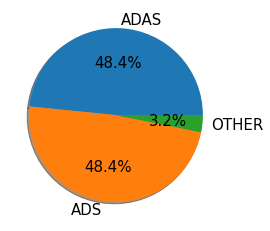

In [41]:
# Plotting data

x1 = len(adas_df)
x2 = len(adas_df)
x3 = len(other_df)

x = [x1, x2, x3]
y = ["ADAS", "ADS", "OTHER"]
c = ["b", "r"]

plt.pie(x, labels = y, radius = 1, autopct = "%0.1f%%", shadow = True, labeldistance = 1.1, startangle = 0, textprops = {"fontsize": 15})
plt.show()


### Comparing Statistical Data

We will be analyzing our data to answer the questions we have set up and prove whether or not car accidents are related to a car being autonomous (ADS) or not.

#### Covariance

x = car accidents (yearly)

y1 = autonomous driven car accidents over a year

y2 = human driven car accidents over a year

The data we are working with comprises the years 2021 and 2022. Taking into consideration the available data, the connection to be made between the cause of accident is whether the mileage is connected to there being an accident or not, reflecting on the possible cause of accident being due to a likely fault from the vehicle or further suggesting the human factor to be a key player in car accidents.

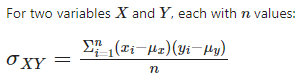

Is there a relation between how old was the car involved in a car accident or not?
- A car is considered to be old after going past the 100,000 mileage mark.

In [10]:
# TOTAL ACCIDENTS

# ADAS
#FIRST YEAR
y1_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-01-01')
                     & (adas_df['Date'] < '2021-02-01')])
y2_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-02-01')
                     & (adas_df['Date'] < '2021-03-01')])
y3_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-03-01')
                     & (adas_df['Date'] < '2021-04-01')])
y4_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-04-01')
                     & (adas_df['Date'] < '2021-05-01')])
y5_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-05-01')
                     & (adas_df['Date'] < '2021-06-01')])
y6_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-06-01')
                     & (adas_df['Date'] < '2021-07-01')])
y7_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-07-01')
                     & (adas_df['Date'] < '2021-08-01')])
y8_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-08-01')
                     & (adas_df['Date'] < '2021-09-01')])
y9_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-09-01')
                     & (adas_df['Date'] < '2021-10-01')])
y10_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-10-01')
                     & (adas_df['Date'] < '2021-11-01')])
y11_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-11-01')
                     & (adas_df['Date'] < '2021-12-01')])
y12_1a = len(adas_df.loc[(adas_df['Date'] >= '2021-12-01')
                     & (adas_df['Date'] < '2022-01-01')])

#SECOND YEAR
y1_2a = len(adas_df.loc[(adas_df['Date'] >= '2021-01-01')
                     & (adas_df['Date'] < '2022-02-01')])
y2_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-02-01')
                     & (adas_df['Date'] < '2022-03-01')])
y3_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-03-01')
                     & (adas_df['Date'] < '2022-04-01')])
y4_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-04-01')
                     & (adas_df['Date'] < '2022-05-01')])
y5_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-05-01')
                     & (adas_df['Date'] < '2022-06-01')])
y6_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-06-01')
                     & (adas_df['Date'] < '2022-07-01')])
y7_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-07-01')
                     & (adas_df['Date'] < '2022-08-01')])
y8_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-08-01')
                     & (adas_df['Date'] < '2022-09-01')])
y9_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-09-01')
                     & (adas_df['Date'] < '2022-10-01')])
y10_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-10-01')
                     & (adas_df['Date'] < '2022-11-01')])
y11_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-11-01')
                     & (adas_df['Date'] < '2022-12-01')])
y12_2a = len(adas_df.loc[(adas_df['Date'] >= '2022-12-01')
                     & (adas_df['Date'] < '2023-01-01')])

# OTHER
#FIRST YEAR
y1_1b = len(other_df.loc[(other_df['Date'] >= '2021-01-01')
                     & (other_df['Date'] < '2021-02-01')])
y2_1b = len(other_df.loc[(other_df['Date'] >= '2021-02-01')
                     & (other_df['Date'] < '2021-03-01')])
y3_1b = len(other_df.loc[(other_df['Date'] >= '2021-03-01')
                     & (other_df['Date'] < '2021-04-01')])
y4_1b = len(other_df.loc[(other_df['Date'] >= '2021-04-01')
                     & (other_df['Date'] < '2021-05-01')])
y5_1b = len(other_df.loc[(other_df['Date'] >= '2021-05-01')
                     & (other_df['Date'] < '2021-06-01')])
y6_1b = len(other_df.loc[(other_df['Date'] >= '2021-06-01')
                     & (other_df['Date'] < '2021-07-01')])
y7_1b = len(other_df.loc[(other_df['Date'] >= '2021-07-01')
                     & (other_df['Date'] < '2021-08-01')])
y8_1b = len(other_df.loc[(other_df['Date'] >= '2021-08-01')
                     & (other_df['Date'] < '2021-09-01')])
y9_1b = len(other_df.loc[(other_df['Date'] >= '2021-09-01')
                     & (other_df['Date'] < '2021-10-01')])
y10_1b = len(other_df.loc[(other_df['Date'] >= '2021-10-01')
                     & (adas_df['Date'] < '2021-11-01')])
y11_1b = len(other_df.loc[(other_df['Date'] >= '2021-11-01')
                     & (other_df['Date'] < '2021-12-01')])
y12_1b = len(other_df.loc[(other_df['Date'] >= '2021-12-01')
                     & (other_df['Date'] < '2022-01-01')])

#SECOND YEAR
y1_2b = len(other_df.loc[(other_df['Date'] >= '2021-01-01')
                     & (other_df['Date'] < '2022-02-01')])
y2_2b = len(other_df.loc[(other_df['Date'] >= '2022-02-01')
                     & (other_df['Date'] < '2022-03-01')])
y3_2b = len(other_df.loc[(other_df['Date'] >= '2022-03-01')
                     & (other_df['Date'] < '2022-04-01')])
y4_2b = len(other_df.loc[(other_df['Date'] >= '2022-04-01')
                     & (other_df['Date'] < '2022-05-01')])
y5_2b = len(other_df.loc[(other_df['Date'] >= '2022-05-01')
                     & (other_df['Date'] < '2022-06-01')])
y6_2b = len(other_df.loc[(other_df['Date'] >= '2022-06-01')
                     & (other_df['Date'] < '2022-07-01')])
y7_2b = len(other_df.loc[(other_df['Date'] >= '2022-07-01')
                     & (other_df['Date'] < '2022-08-01')])
y8_2b = len(other_df.loc[(other_df['Date'] >= '2022-08-01')
                     & (other_df['Date'] < '2022-09-01')])
y9_2b = len(other_df.loc[(other_df['Date'] >= '2022-09-01')
                     & (other_df['Date'] < '2022-10-01')])
y10_2b = len(other_df.loc[(other_df['Date'] >= '2022-10-01')
                     & (other_df['Date'] < '2022-11-01')])
y11_2b = len(other_df.loc[(other_df['Date'] >= '2022-11-01')
                     & (other_df['Date'] < '2022-12-01')])
y12_2b = len(other_df.loc[(other_df['Date'] >= '2022-12-01')
                     & (other_df['Date'] < '2023-01-01')])

y1_1 = y1_1a + y1_1b
y2_1 = y2_1a + y2_1b
y3_1 = y3_1a + y3_1b
y4_1 = y4_1a + y4_1b
y5_1 = y5_1a + y5_1b
y6_1 = y6_1a + y6_1b
y7_1 = y7_1a + y7_1b
y8_1 = y8_1a + y8_1b
y9_1 = y9_1a + y9_1b
y10_1 = y10_1a + y10_1b
y11_1 = y11_1a + y11_1b
y12_1 = y12_1a + y12_1b

y1_2 = y1_2a + y1_2b
y2_2 = y2_2a + y2_2b
y3_2 = y3_2a + y3_2b
y4_2 = y4_2a + y4_2b
y5_2 = y5_2a + y5_2b
y6_2 = y6_2a + y6_2b
y7_2 = y7_2a + y7_2b
y8_2 = y8_2a + y8_2b
y9_2 = y9_2a + y9_2b
y10_2 = y10_2a + y10_2b
y11_2 = y11_2a + y11_2b
y12_2 = y12_2a + y12_2b

# CAR MODELS

# ADAS 
#FIRST YEAR
x1_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-01-01') & (adas_df['Date'] < '2021-02-01')])
x2_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-02-01') & (adas_df['Date'] < '2021-03-01')])
x3_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-03-01') & (adas_df['Date'] < '2021-04-01')])
x4_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-04-01') & (adas_df['Date'] < '2021-05-01')])
x5_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-05-01') & (adas_df['Date'] < '2021-06-01')])
x6_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-06-01') & (adas_df['Date'] < '2021-07-01')])
x7_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-07-01') & (adas_df['Date'] < '2021-08-01')])
x8_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-08-01') & (adas_df['Date'] < '2021-09-01')])
x9_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-09-01') & (adas_df['Date'] < '2021-10-01')])
x10_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-10-01') & (adas_df['Date'] < '2021-11-01')])
x11_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-11-01') & (adas_df['Date'] < '2021-12-01')])
x12_1a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2021-12-01') & (adas_df['Date'] < '2022-01-01')])
#SECOND YEAR
x1_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-01-01') & (adas_df['Date'] < '2022-02-01')])
x2_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-02-01') & (adas_df['Date'] < '2022-03-01')])
x3_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-03-01') & (adas_df['Date'] < '2022-04-01')])
x4_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-04-01') & (adas_df['Date'] < '2022-05-01')])
x5_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-05-01') & (adas_df['Date'] < '2022-06-01')])
x6_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-06-01') & (adas_df['Date'] < '2022-07-01')])
x7_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-07-01') & (adas_df['Date'] < '2022-08-01')])
x8_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-08-01') & (adas_df['Date'] < '2022-09-01')])
x9_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-09-01') & (adas_df['Date'] < '2022-10-01')])
x10_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-10-01') & (adas_df['Date'] < '2022-11-01')])
x11_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-11-01') & (adas_df['Date'] < '2022-12-01')])
x12_2a = len(adas_df[(adas_df['Mileage'] >= 100000) & (adas_df['Date'] >= '2022-12-01') & (adas_df['Date'] < '2023-01-01')])

# OTHER
#FIRST YEAR
x1_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-01-01') & (other_df['Date'] < '2021-02-01')])
x2_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-02-01') & (other_df['Date'] < '2021-03-01')])
x3_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-03-01') & (other_df['Date'] < '2021-04-01')])
x4_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-04-01') & (other_df['Date'] < '2021-05-01')])
x5_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-05-01') & (other_df['Date'] < '2021-06-01')])
x6_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-06-01') & (other_df['Date'] < '2021-07-01')])
x7_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-07-01') & (other_df['Date'] < '2021-08-01')])
x8_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-08-01') & (other_df['Date'] < '2021-09-01')])
x9_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-09-01') & (other_df['Date'] < '2021-10-01')])
x10_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-10-01') & (other_df['Date'] < '2021-11-01')])
x11_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-11-01') & (other_df['Date'] < '2021-12-01')])
x12_1b = len(other_df[(other_df['Mileage'] >= 100000) & (other_df['Date'] >= '2021-12-01') & (other_df['Date'] < '2022-01-01')])
#SECOND YEAR
x1_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-01-01') & (other_df['Date'] < '2022-02-01')])
x2_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-02-01') & (other_df['Date'] < '2022-03-01')])
x3_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-03-01') & (other_df['Date'] < '2022-04-01')])
x4_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-04-01') & (other_df['Date'] < '2022-05-01')])
x5_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-05-01') & (other_df['Date'] < '2022-06-01')])
x6_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-06-01') & (other_df['Date'] < '2022-07-01')])
x7_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-07-01') & (other_df['Date'] < '2022-08-01')])
x8_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-08-01') & (other_df['Date'] < '2022-09-01')])
x9_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-09-01') & (other_df['Date'] < '2022-10-01')])
x10_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-10-01') & (other_df['Date'] < '2022-11-01')])
x11_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-11-01') & (other_df['Date'] < '2022-12-01')])
x12_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-12-01') & (other_df['Date'] < '2023-01-01')])

x1_1 = x1_1a + x1_1b
x2_1 = x2_1a + x2_1b
x3_1 = x3_1a + x3_1b
x4_1 = x4_1a + x4_1b
x5_1 = x5_1a + x5_1b
x6_1 = x6_1a + x6_1b
x7_1 = x7_1a + x7_1b
x8_1 = x8_1a + x8_1b
x9_1 = x9_1a + x9_1b
x10_1 = x10_1a + x10_1b
x11_1 = x11_1a + x11_1b
x12_1 = x12_1a + x12_1b

x1_2 = x1_2a + x1_2b
x2_2 = x2_2a + x2_2b
x3_2 = x3_2a + x3_2b
x4_2 = x4_2a + x4_2b
x5_2 = x5_2a + x5_2b
x6_2 = x6_2a + x6_2b
x7_2 = x7_2a + x7_2b
x8_2 = x8_2a + x8_2b
x9_2 = x9_2a + x9_2b
x10_2 = x10_2a + x10_2b
x11_2 = x11_2a + x11_2b
x12_2 = x12_2a + x12_2b

X = [x1_1, x2_1, x3_1, x4_1, x5_1, x6_1, x7_1, x8_1, x9_1, x10_1, x11_1, x12_1, x1_2, x2_2, x3_2, x4_2, x5_2, x6_2, x7_2, x8_2, x9_2, x10_2, x11_2, x12_2]
Y = [y1_1, y2_1, y3_1, y4_1, y5_1, y6_1, y7_1, y8_1, y9_1, y10_1, y11_1, y12_1, y1_2, y2_2, y3_2, y4_2, y5_2, y6_2, y7_2, y8_2, y9_2, y10_2, y11_2, y12_2]

C:\Users\rcortesvazquez\AppData\Local\Temp\ipykernel_11756\3011299134.py:181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-01-01') & (other_df['Date'] < '2022-02-01')])
C:\Users\rcortesvazquez\AppData\Local\Temp\ipykernel_11756\3011299134.py:182: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-02-01') & (other_df['Date'] < '2022-03-01')])
C:\Users\rcortesvazquez\AppData\Local\Temp\ipykernel_11756\3011299134.py:183: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x3_2b = len(other_df[(adas_df['Mileage'] >= 100000) & (other_df['Date'] >= '2022-03-01') & (other_df['Date'] < '2022-04-01')])
C:\Users\rcortesvazquez\AppData\Local\Temp\ipykernel_11756\3011299134.py:184: UserWarning: Boolean Series key will be reindexed to match DataFrame inde

In [11]:
# Covariance using NumPy:

np.cov(X, Y, ddof=0)[0, 1]

57.982638888888886

### Correlation

To understand the data we must standarize using correlation.

In [12]:
np.corrcoef(X, Y)

array([[1.       , 0.4022634],
       [0.4022634, 1.       ]])

Is there a relation?

In [13]:
np.corrcoef(X, Y)[0, 1] == (np.cov(X, Y, ddof=0) / (np.std(X) * np.std(Y)))[0, 1]

False

In [15]:
df = adas_df
#pd.concat([adas_df, other_df])
df1 = df[(df['Date'] >= '2021-01-01') & (df['Date'] < '2022-01-01')]
#df1 = df1.insert(8, 'Date', '2021')
df2 = df[(df['Date'] >= '2022-01-01') & (df['Date'] < '2023-01-01')]
df1

,Report_ID,VIN,Date,Make,Model,Model_Year,Mileage,State,Level_of_Driving_Automation
785,13781-1981,5YJ3E1EA2MF,2021-12-01,Tesla,Model 3,2021,895.0,TX,ADAS
787,13781-1986,5YJ3E1EA7JF,2021-12-01,Tesla,Model 3,2018,35678.0,AZ,ADAS
788,13781-1978,5YJ3E1EB5KF,2021-12-01,Tesla,Model 3,2019,45148.0,CO,ADAS
789,13781-1977,5YJ3E1EA3HF,2021-12-01,Tesla,Model 3,2017,55888.0,OH,ADAS
790,13781-1976,5YJ3E1EA7MF,2021-12-01,Tesla,Model 3,2021,61101.0,CA,ADAS
...,...,...,...,...,...,...,...,...,...
1160,13781-23,5YJSA1E14FF,2021-07-01,Tesla,Model S,2015,51915.0,CA,ADAS
1161,10039-8,5UXCR6C5XKL,2021-07-01,BMW,X5 xDrive40i,2019,30673.0,FL,ADAS
1163,13781-19,5YJYGDEE0LF,2021-07-01,Tesla,Model Y,2020,14365.0,CA,ADAS
1164,13781-14,5YJ3E1EB7LF,2021-07-01,Tesla,Model 3,2020,41096.0,TX,ADAS


In [16]:
df1 = df1.drop(['Date'], axis=1)
df1['Date'] = '2021'
df1["Date"] = pd.to_numeric(df1["Date"])
df1

,Report_ID,VIN,Make,Model,Model_Year,Mileage,State,Level_of_Driving_Automation,Date
785,13781-1981,5YJ3E1EA2MF,Tesla,Model 3,2021,895.0,TX,ADAS,2021
787,13781-1986,5YJ3E1EA7JF,Tesla,Model 3,2018,35678.0,AZ,ADAS,2021
788,13781-1978,5YJ3E1EB5KF,Tesla,Model 3,2019,45148.0,CO,ADAS,2021
789,13781-1977,5YJ3E1EA3HF,Tesla,Model 3,2017,55888.0,OH,ADAS,2021
790,13781-1976,5YJ3E1EA7MF,Tesla,Model 3,2021,61101.0,CA,ADAS,2021
...,...,...,...,...,...,...,...,...,...
1160,13781-23,5YJSA1E14FF,Tesla,Model S,2015,51915.0,CA,ADAS,2021
1161,10039-8,5UXCR6C5XKL,BMW,X5 xDrive40i,2019,30673.0,FL,ADAS,2021
1163,13781-19,5YJYGDEE0LF,Tesla,Model Y,2020,14365.0,CA,ADAS,2021
1164,13781-14,5YJ3E1EB7LF,Tesla,Model 3,2020,41096.0,TX,ADAS,2021


### Convolutional Neural Network

Here we will load images from our dataset to be processed by our models down below. This images contain photographies from traffic jams, car traffic, highways and other transit footage that we seek to process.

Additionally we will be filtering out the different pixels in each channel and z-axis.

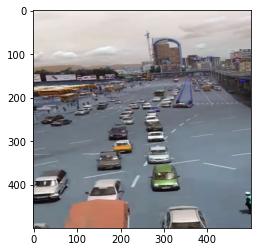

In [20]:
imagePaths = list(paths.list_images(r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\obj\sample_img"))
imagePaths

for imagePath in imagePaths:
    
    image = cv2.imread(imagePath)
    print(f'There are {image.shape[0]} pixels in the vertical channel')
    print(f'There are {image.shape[1]} pixels in the horizontal channel')
    print(f'There are {image.shape[2]} pixels in the "z-axis"')
    
    cv2.imshow("Frame", image)
    cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)

I built and trained a model using the Teachable machine by Google. The model was trained with 37 different images from cars in transit and during traffic jams and half that same number with empty roads, avenues and streets. This will enable our model to determine when cars are present at a given moment in what could be a traffic camera.

In [21]:
# Disabling scientific notation for clarity
np.set_printoptions(suppress=True)

# Loading the model
model = load_model(r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\mod\keras_model.h5", compile=False)

# Loading the labels, in this case it's just 2. Positive feedback and negative feedback.
class_names = open(r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\mod\labels.txt", "r").readlines()

# Grabbing the images.
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
        
    # Resizing the image
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
        
    # Showing the image that's being analyzed
    cv2.imshow("Image", image)
        
    # Making the image a numpy array and reshaping it to the models input shape
    image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)
        
    # Normalizing the image array
    image = (image / 127.5) - 1
        
    # Predicts the model
    prediction = model.predict(image)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
        
    # Printing both the prediction and confidence score
    print("Class:", class_name[2:], end="")
    print("Confidence Score:", str(np.round(confidence_score * 100))[:-2], "%")
    
    cv2.waitKey()

cv2.destroyAllWindows()

1/1 [==============================] - 1s 799ms/step
Class: Car
Confidence Score: 100 %
1/1 [==============================] - 0s 170ms/step
Class: Car
Confidence Score: 100 %
1/1 [==============================] - 0s 154ms/step
Class: Car
Confidence Score: 100 %
1/1 [==============================] - 0s 67ms/step
Class: Car
Confidence Score: 100 %
1/1 [==============================] - 0s 30ms/step
Class: Car
Confidence Score: 100 %


The proposal I seek to make is to use traffic cameras to make traffic more efficient by connecting them with ADS. Car to car communication would be the best and quickest solution to autononous cars, however, regulations, connectivity and wireless communication still not being well protected from ciber-security risks, makes it a non viable solution. Nonetheless, communicating traffic light cameras and stations in every red light with cars could be an easier and more functional solution for the current situation.

Object Tracking and Object Detection -> 2 Different things.

Object Tracking is the detection and subsequent following of an object moving in video footage, whereas Object Detection is the detection of an object or set of objects in an image.


Therefore, I consider a camera taking a pictures during the red lights more cost-effective than a camera gathering live footage since for the purpose of this project we seek to control traffic movement in red lights to make it as more cars can move during a green light by simply connecting these ADS vehicles and synchronizing them so as to move altoghether as one with almost no delay when a red light turns green. This way the camera being set up over the red light can activate only when the light turns red.

In [27]:
# Here we are loading a text file with labels for a second model to work with when detecting data.

config_file = r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\obj\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\obj\frozen_inference_graph.pb"
labelfile_name = r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\obj\labels.txt"
model = cv2.dnn_DetectionModel(frozen_model, config_file)

classLabels = []

with open(labelfile_name, 'r') as fpt:
    
    classLabels = fpt.read().rstrip('\n').split('\n')
    
print(classLabels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


This model will now put a box around the individual cars and other vehicles it detects during traffic imagery. It also prints the index number corresponding number to each object from it's labelling file.

In [29]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
imagePaths = list(paths.list_images(r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\obj\sample_img"))
imagePaths

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    
    ClassIndex, confidence, bbox=model.detect(image, confThreshold=0.5)
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
        
        cv2.rectangle(image, boxes, (255,0,0), 1)
        cv2.putText(image, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)
    
    print(ClassIndex)

    cv2.imshow("Frame", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    cv2.waitKey()
    cv2.destroyAllWindows()

[3 6]
[3 3 3 6]
[3 6 3 3 3]
[6 3 3 3]
[3 3]


We can improve accuracy of our model both by increasing the training data and by using Open CV Cascade Classifier tools.

In [36]:

cascade_src = r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\obj\cars.xml"

imagePaths = list(paths.list_images(r"C:\Users\rcortesvazquez\Documents\Academy\AI\FP\CapstoneProjectR\data\Traffic congestion Dataset\obj\sample_img"))
imagePaths

car_cascade = cv2.CascadeClassifier(cascade_src)

for imagePath in imagePaths:
    
    image = cv2.imread(imagePath)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    cars = car_cascade.detectMultiScale(gray, 1.1, 1)

    for (x,y,w,h) in cars:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)      
    
    cv2.imshow("Image", image)
    
    cv2.waitKey()

cv2.destroyAllWindows()

## Conclusions

In conclusion, it's not suggested there being a connection between car accidents and ADS systems being involved with faulty machinery and the most likely situation remaining the human factor, which according to the National Library of Medicine does play a key factor. Inexperience, substance abuse, distractions, poor eyesight, speeding or fatigue are some of the most relevant causes of car crashes.

### Sources

https://pubmed.ncbi.nlm.nih.gov/11297224/

https://www.sfmta.com/projects/driving-automation-systems-advanced-driver-assistance-systems-adas-and-automated-driving#:~:text=%E2%80%9CDriving%20automation%E2%80%9D%20refers%20to%20both%20Advanced%20Driver%20Assistance,to%20operate%20a%20vehicle%20without%20a%20human%20driver.

https://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html

https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html?highlight=car%20detection#void%20CascadeClassifier::detectMultiScale(const%20Mat&%20image,%20vector%3CRect%3E&%20objects,%20double%20scaleFactor,%20int%20minNeighbors,%20int%20flags,%20Size%20minSize,%20Size%20maxSize)



Doing regression